In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
cbg_data = pd.read_csv('data\\cbg_patterns.csv')
print('*********default values*********')
print(cbg_data.isnull().any())
print('*********default values numbers*********')
print(cbg_data.isnull().sum())

# print(cbg_data)

*********default values*********
census_block_group           True
date_range_start            False
date_range_end              False
raw_visit_count              True
raw_visitor_count            True
visitor_home_cbgs           False
visitor_work_cbgs           False
distance_from_home           True
related_same_day_brand      False
related_same_month_brand    False
top_brands                  False
popularity_by_hour          False
popularity_by_day           False
dtype: bool
*********default values numbers*********
census_block_group            1
date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64


In [3]:
Nominal_attr = ['visitor_home_cbgs', 'visitor_work_cbgs', 'related_same_day_brand',
              'related_same_month_brand', 'top_brands', 'popularity_by_hour',
             'popularity_by_day']
Numeric_attr = ['census_block_group', 'date_range_start', 'date_range_end',
              'raw_visit_count', 'raw_visitor_count', 'distance_from_home']

In [4]:
print('Data Summary')
print(cbg_data[Nominal_attr + Numeric_attr].describe(include='all'))

print('counts in nominal attributes')
for nominal_attr in Nominal_attr:
    print('******' + nominal_attr + '******')
    print(cbg_data[nominal_attr].value_counts())
    
print('numeric attributes')

for numeric_attr in Numeric_attr:
    print('******' + numeric_attr + '******')
    print(cbg_data[numeric_attr].describe())
    print('default value counts: ', cbg_data[numeric_attr].isnull().sum())
    

Data Summary
       visitor_home_cbgs visitor_work_cbgs related_same_day_brand  \
count             220735            220735                 220735   
unique            191832            166013                  73198   
top                   {}                {}                     []   
freq               28412             51152                  35542   
mean                 NaN               NaN                    NaN   
std                  NaN               NaN                    NaN   
min                  NaN               NaN                    NaN   
25%                  NaN               NaN                    NaN   
50%                  NaN               NaN                    NaN   
75%                  NaN               NaN                    NaN   
max                  NaN               NaN                    NaN   

       related_same_month_brand top_brands popularity_by_hour  \
count                    220735     220735             220735   
unique                   185

Image plot


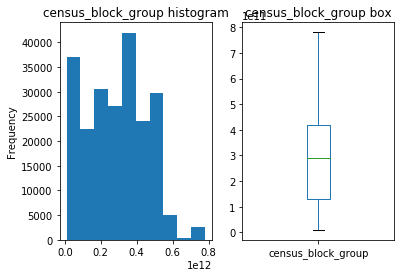

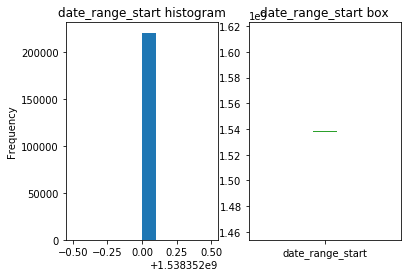

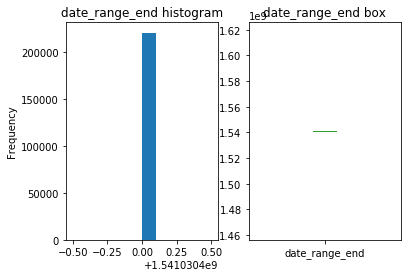

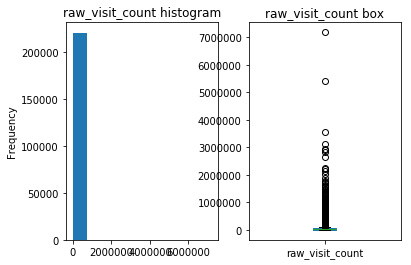

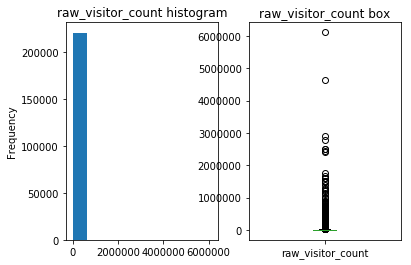

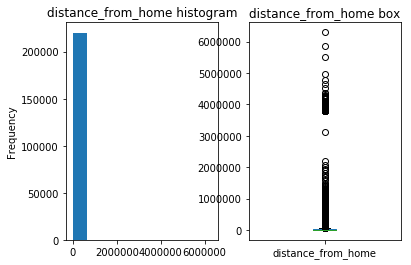

In [5]:
print('Image plot')

for numeric_attr in Numeric_attr:
    plt.subplot(1, 2, 1)
    plt.title(numeric_attr + ' histogram')
    cbg_data[numeric_attr].plot(kind='hist')
    plt.subplot(1, 2, 2)
    plt.title(numeric_attr + ' box')
    cbg_data[numeric_attr].to_frame().boxplot(grid=False)
    plt.show()

For Nominal attributes, we only show the top-k. The rest named as "Others"


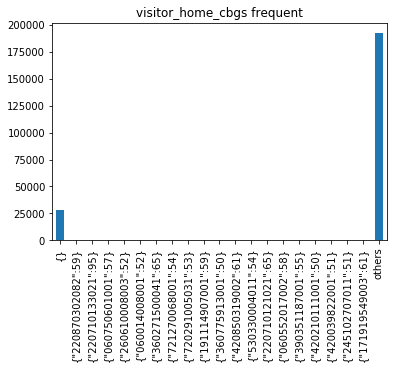

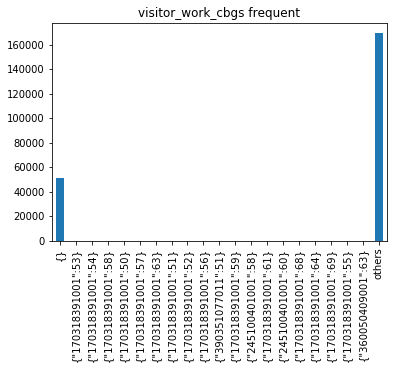

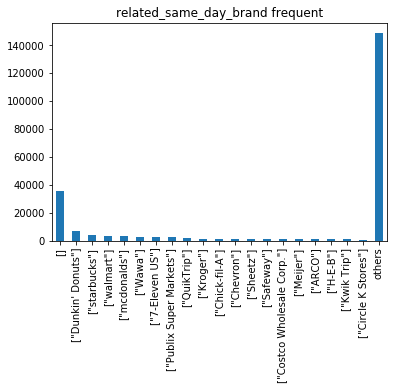

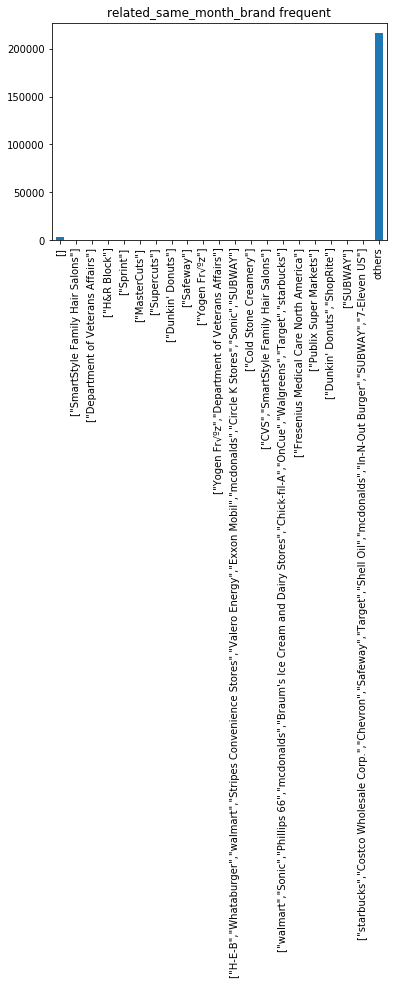

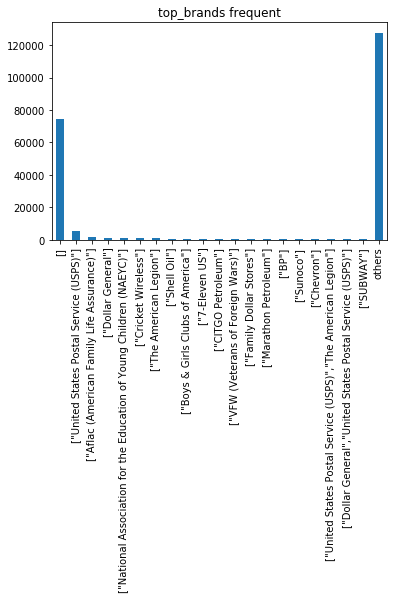

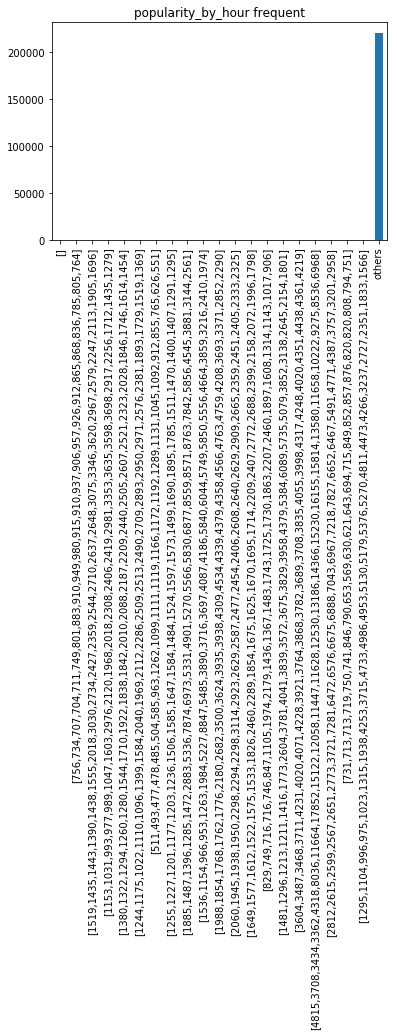

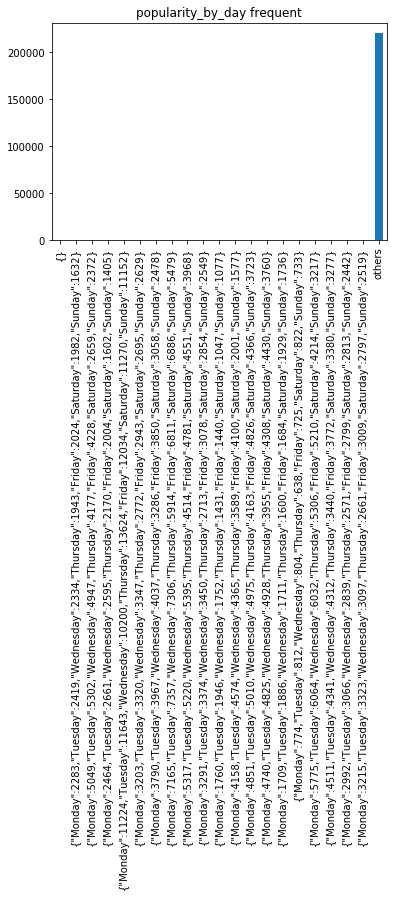

In [6]:
print('For Nominal attributes, we only show the top-k. The rest named as "Others"')
top_k = 20
for nominal_attr in Nominal_attr:
    nomi_data = cbg_data[nominal_attr].value_counts()[:top_k].copy()
    nomi_data.loc['others'] = cbg_data[nominal_attr].value_counts()[top_k:].sum()
    plt.figure()
    plt.title(nominal_attr + ' frequent')
    nomi_data.plot.bar()
    plt.show()


Handling missing data
-------Delete missing data--------
******census_block_group******
count    2.207340e+05
mean     2.870864e+11
std      1.640723e+11
min      1.001020e+10
25%      1.312101e+11
50%      2.901900e+11
75%      4.200349e+11
max      7.803099e+11
Name: census_block_group, dtype: float64
******raw_visit_count******
count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64
******raw_visitor_count******
count    2.206290e+05
mean     1.182032e+04
std      3.045832e+04
min      5.000000e+01
25%      3.430000e+03
50%      6.541000e+03
75%      1.309900e+04
max      6.113949e+06
Name: raw_visitor_count, dtype: float64
******distance_from_home******
count    2.205180e+05
mean     3.511280e+04
std      9.973193e+04
min      7.060000e+02
25%      8.584000e+03
50%      1.461400e+04
75%      3.139775e+04
max      6.297845e+06


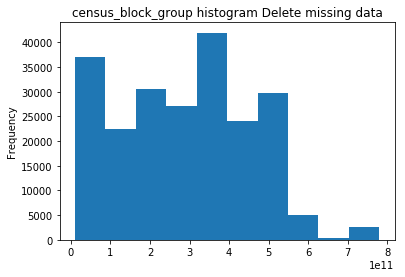

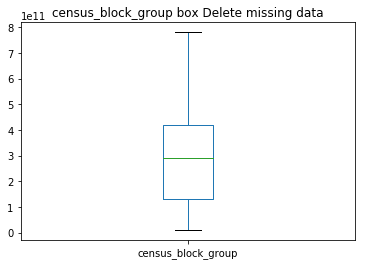

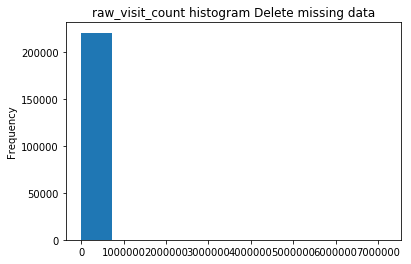

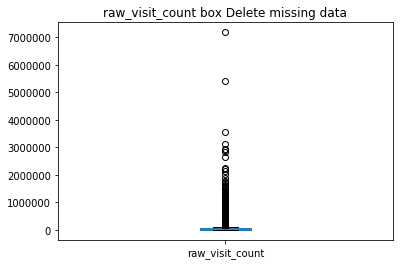

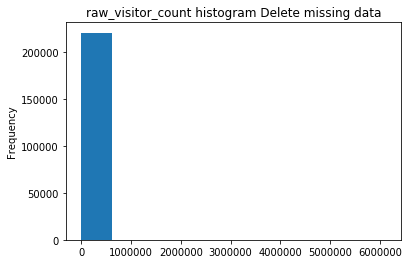

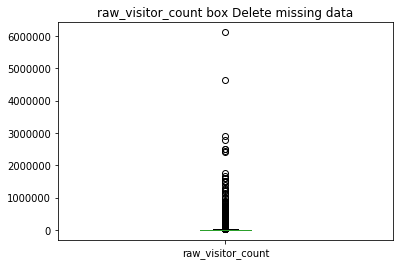

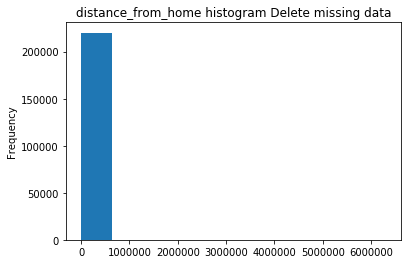

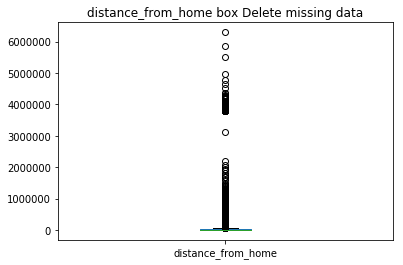

In [7]:
print('Handling missing data')
print('-------Delete missing data--------')
for nominal_attr in Nominal_attr:
    if cbg_data[nominal_attr].isnull().sum() != 0:
        print('******' + nominal_attr + '******')
        print(cbg_data[nominal_attr].dropna().value_counts())
        
for numeric_attr in Numeric_attr:
    if cbg_data[numeric_attr].isnull().sum() != 0:
        print('******' + numeric_attr + '******')
        print(cbg_data[numeric_attr].dropna().describe())
        plt.figure()
        plt.title(numeric_attr + ' histogram ' + 'Delete missing data')
        cbg_data[numeric_attr].dropna().plot(kind='hist')
        plt.show()
        plt.figure()
        plt.title(numeric_attr + ' box ' + 'Delete missing data')
        cbg_data[numeric_attr].dropna().to_frame().boxplot(grid=False)
        plt.show()
        

-------Replaced with mode--------
******census_block_group******
count    2.207350e+05
mean     2.870851e+11
std      1.640730e+11
min      1.001020e+10
25%      1.312101e+11
50%      2.901900e+11
75%      4.200349e+11
max      7.803099e+11
Name: census_block_group, dtype: float64
******raw_visit_count******
count    2.207350e+05
mean     4.791942e+04
std      6.251364e+04
min      6.000000e+01
25%      1.704700e+04
50%      3.062500e+04
75%      5.665200e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64
******raw_visitor_count******
count    2.207350e+05
mean     1.181574e+04
std      3.045172e+04
min      5.000000e+01
25%      3.426000e+03
50%      6.536000e+03
75%      1.309150e+04
max      6.113949e+06
Name: raw_visitor_count, dtype: float64
******distance_from_home******
count    2.207350e+05
mean     3.508649e+04
std      9.968642e+04
min      7.060000e+02
25%      8.570000e+03
50%      1.459600e+04
75%      3.136700e+04
max      6.297845e+06
Name: distance_from_hom

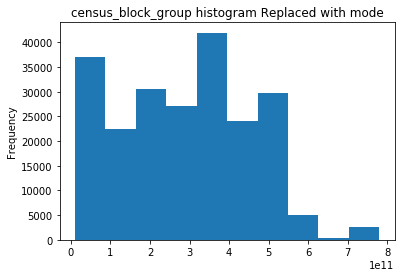

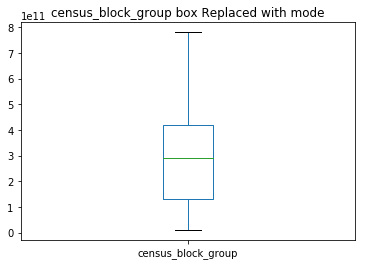

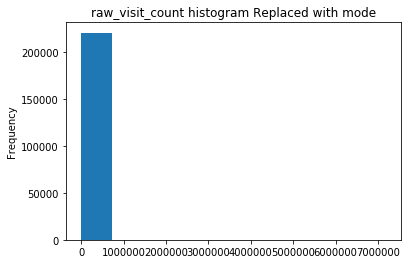

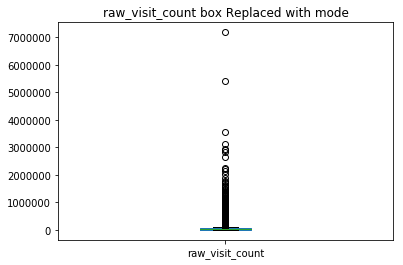

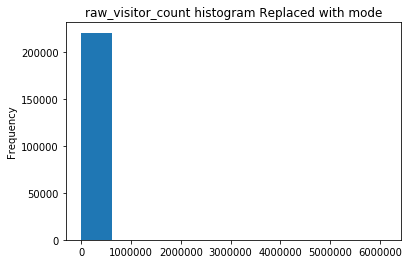

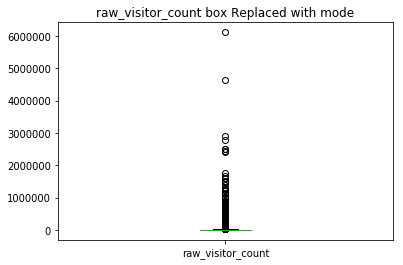

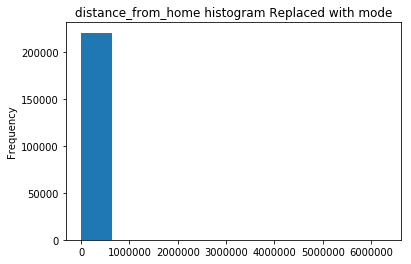

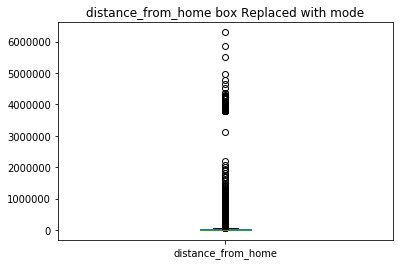

In [8]:
print('-------Replaced with mode--------')
for nominal_attr in Nominal_attr:
    if cbg_data[nominal_attr].isnull().sum() != 0:
        print('******' + nominal_attr + '******')
        mode = cbg_data[nominal_attr].mode().values[0]
        print(cbg_data[nominal_attr].fillna(value=mode).value_counts())
        
for numeric_attr in Numeric_attr:
    if cbg_data[numeric_attr].isnull().sum() != 0:
        print('******' + numeric_attr + '******')
        mode = cbg_data[numeric_attr].mode().values[0]
        print(cbg_data[numeric_attr].fillna(value=mode).describe())
        
        plt.figure()
        plt.title(numeric_attr + ' histogram ' + 'Replaced with mode')
        cbg_data[numeric_attr].fillna(value=mode).plot(kind='hist')
        plt.show()
        plt.figure()
        plt.title(numeric_attr + ' box ' + 'Replaced with mode')
        cbg_data[numeric_attr].fillna(value=mode).to_frame().boxplot(grid=False)
        plt.show()

-------Filled with correlation--------
******census_block_group******
count    2.207350e+05
mean     2.870864e+11
std      1.640719e+11
min      1.001020e+10
25%      1.312101e+11
50%      2.901900e+11
75%      4.200349e+11
max      7.803099e+11
Name: census_block_group, dtype: float64
******date_range_start******
count    2.207350e+05
mean     1.538352e+09
std      0.000000e+00
min      1.538352e+09
25%      1.538352e+09
50%      1.538352e+09
75%      1.538352e+09
max      1.538352e+09
Name: date_range_start, dtype: float64
******date_range_end******
count    2.207350e+05
mean     1.541030e+09
std      0.000000e+00
min      1.541030e+09
25%      1.541030e+09
50%      1.541030e+09
75%      1.541030e+09
max      1.541030e+09
Name: date_range_end, dtype: float64
******raw_visit_count******
count    2.207350e+05
mean     4.793066e+04
std      6.251153e+04
min      6.000000e+01
25%      1.704700e+04
50%      3.065600e+04
75%      5.665200e+04
max      7.179900e+06
Name: raw_visit_count, dt

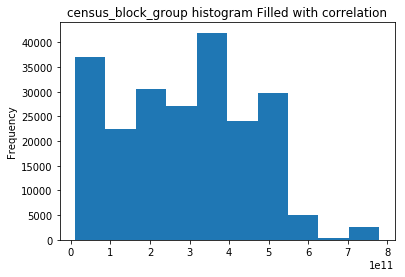

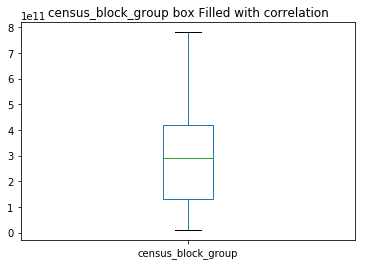

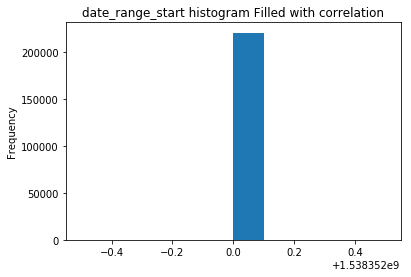

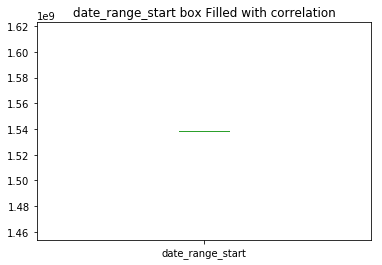

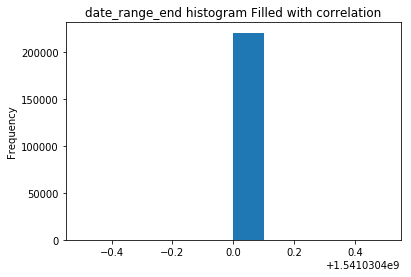

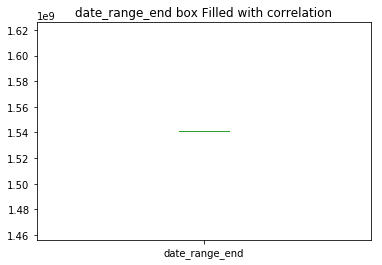

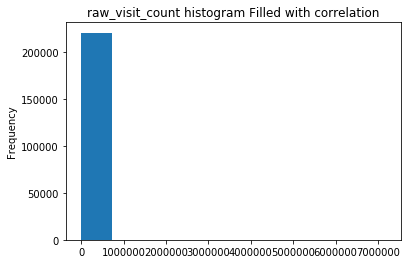

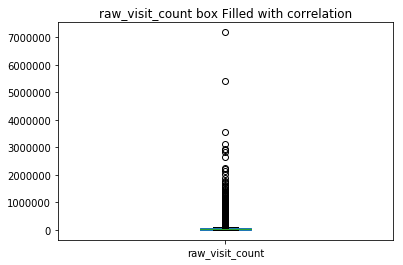

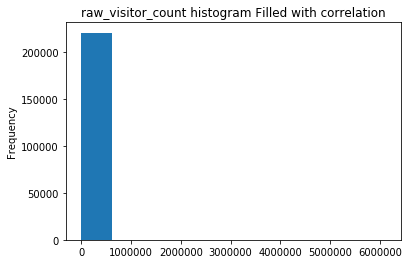

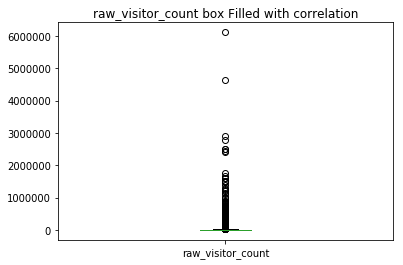

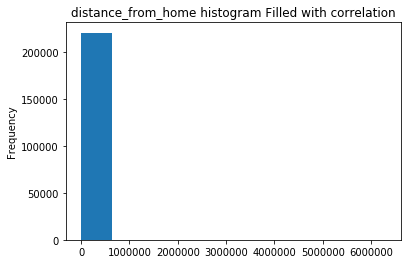

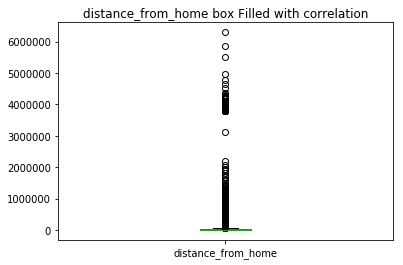

In [9]:
print('-------Filled with correlation--------')
from sklearn.impute import SimpleImputer

df_data = cbg_data[Numeric_attr].copy()
imp = SimpleImputer(strategy='mean')
df_data.loc[:, Numeric_attr] = imp.fit_transform(df_data)

for numeric_attr in Numeric_attr:
    print('******' + numeric_attr + '******')
    mode = df_data[numeric_attr].mode().values[0]
    print(df_data[numeric_attr].describe())
    
    plt.figure()
    plt.title(numeric_attr + ' histogram ' + 'Filled with correlation')
    df_data[numeric_attr].plot(kind='hist')
    plt.show()
    plt.figure()
    plt.title(numeric_attr + ' box ' + 'Filled with correlation')
    df_data[numeric_attr].to_frame().boxplot(grid=False)
    plt.show()



In [11]:
print('-------Filled with record similarity--------')
print('for missing data(Price), we take SVD method for Points in same Country')
from fancyimpute import SoftImpute

-------Filled with record similarity--------
for missing data(Price), we take SVD method for Points in same Country


Using TensorFlow backend.


******census_block_group******
count    2.207350e+05
mean     2.870851e+11
std      1.640730e+11
min      5.285135e+08
25%      1.312101e+11
50%      2.901900e+11
75%      4.200349e+11
max      7.803099e+11
Name: census_block_group, dtype: float64
******date_range_start******
count    2.207350e+05
mean     1.538352e+09
std      0.000000e+00
min      1.538352e+09
25%      1.538352e+09
50%      1.538352e+09
75%      1.538352e+09
max      1.538352e+09
Name: date_range_start, dtype: float64
******date_range_end******
count    2.207350e+05
mean     1.541030e+09
std      0.000000e+00
min      1.541030e+09
25%      1.541030e+09
50%      1.541030e+09
75%      1.541030e+09
max      1.541030e+09
Name: date_range_end, dtype: float64
******raw_visit_count******
count    2.207350e+05
mean     4.793234e+04
std      6.251480e+04
min      6.000000e+01
25%      1.704500e+04
50%      3.064600e+04
75%      5.669700e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64
******raw_visitor_count***

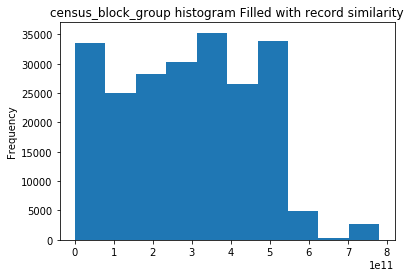

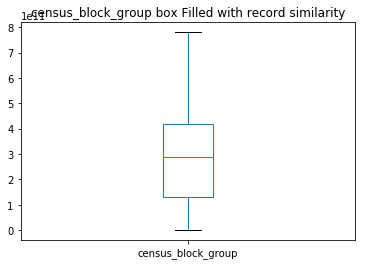

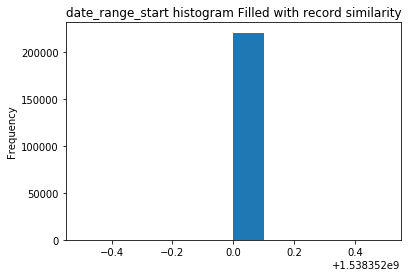

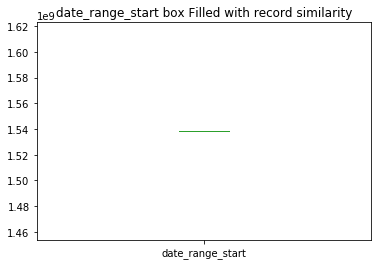

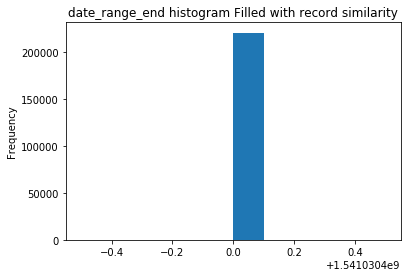

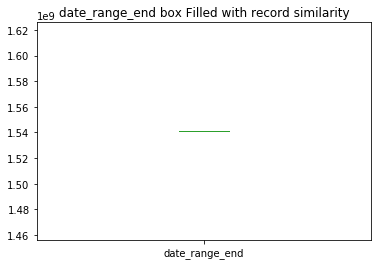

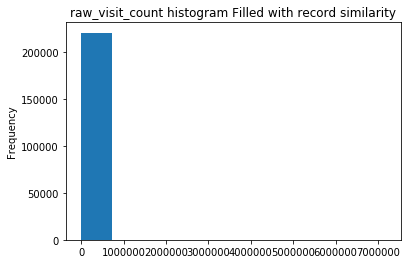

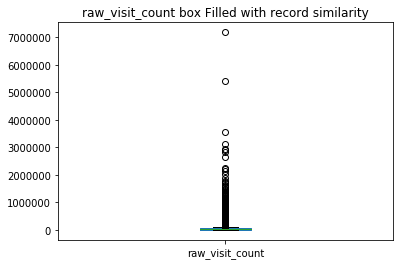

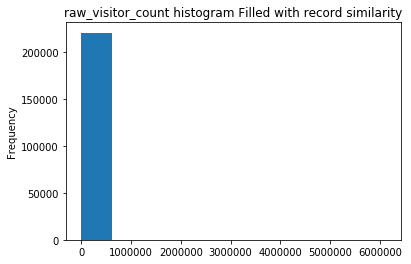

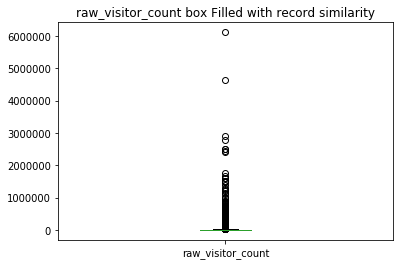

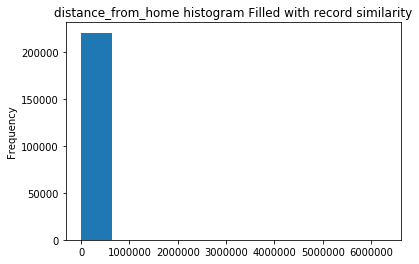

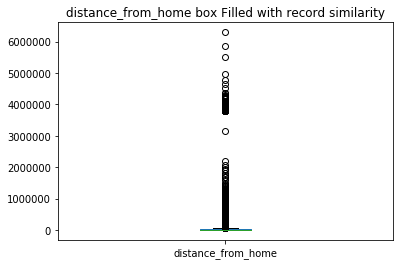

In [12]:
df_data = cbg_data[Numeric_attr].copy()
df_data.loc[:, Numeric_attr] = SoftImpute(verbose=False).fit_transform(df_data)

for numeric_attr in Numeric_attr:

    print('******' + numeric_attr + '******')
    print(df_data[numeric_attr].describe())

    plt.figure()
    plt.title(numeric_attr + ' histogram ' + 'Filled with record similarity')
    df_data[numeric_attr].plot(kind='hist')
    plt.show()
    plt.figure()
    plt.title(numeric_attr + ' box ' + 'Filled with record similarity')
    df_data[numeric_attr].to_frame().boxplot(grid=False)
    plt.show()

